In [1746]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

## Import Data

In [1747]:
train = pd.read_csv('/Users/saptarshipal/DATA/spaceship-titanic/data/train.csv')
test = pd.read_csv('/Users/saptarshipal/DATA/spaceship-titanic/data/test.csv')
print(train.shape,test.shape)

(8693, 14) (4277, 13)


In [1748]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [1749]:
train.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<AxesSubplot: xlabel='Age', ylabel='Transported'>

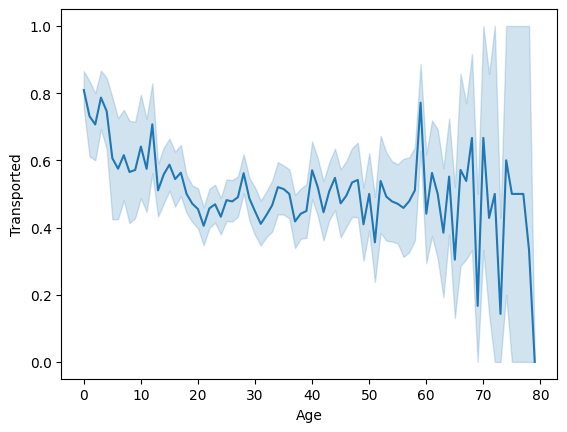

In [1750]:
sns.lineplot(data=train,x ='Age',y='Transported')

In [1751]:
train[train['Age'] == 0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,True
86,0092_02,Earth,True,G/9/P,TRAPPIST-1e,0.0,False,0.0,0.0,NaN,0.0,0.0,Stald Hewson,True
102,0108_03,Earth,False,G/19/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,0.0,0.0,0.0,Oline Handertiz,True
157,0179_02,Earth,False,G/26/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Raque Webstephrey,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8494,9074_01,Earth,True,G/1460/S,TRAPPIST-1e,0.0,NaN,0.0,0.0,NaN,0.0,0.0,Adamie Trerady,True
8584,9163_01,Earth,True,G/1477/S,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Idace Edwartizman,True
8650,9227_04,Earth,True,G/1498/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Robyny Hinglendez,True
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True


In [1752]:
train[train['Cabin']=='G/10/S']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
61,0067_01,Earth,True,G/10/S,PSO J318.5-22,0.0,False,0.0,0.0,0.0,0.0,0.0,Ninaha Leeves,True
62,0067_02,Earth,False,G/10/S,TRAPPIST-1e,18.0,False,1.0,258.0,446.0,0.0,0.0,Celine Leeves,True


In [1753]:
train[['Name','Cabin']].sort_values(by = 'Cabin')

,Name,Cabin
114,Kleeiak Coning,A/0/P
113,Batan Coning,A/0/P
2,Altark Susent,A/0/S
3,Solam Susent,A/0/S
52,Okulas Tractive,A/1/S
...,...,...
8209,Naosura Motled,NaN
8475,Coxan Statch,NaN
8485,Bath Brakeng,NaN
8509,Beula Clemondsey,NaN


In [1754]:
train1 = train.copy()
test1 = test.copy()

In [1755]:
train1.drop(columns = ['PassengerId','Name','Cabin'],axis =1, inplace =True)
test1.drop(columns = ['PassengerId','Name','Cabin'],axis =1, inplace =True)
#train1.head()

# Imputing

In [1756]:
train1.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [1757]:
train1.HomePlanet.unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [1758]:
train1[train1.HomePlanet == 'Europa']

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
9,Europa,True,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True
10,Europa,True,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8686,Europa,False,TRAPPIST-1e,32.0,False,1.0,1146.0,0.0,50.0,34.0,False
8687,Europa,NaN,TRAPPIST-1e,30.0,False,0.0,3208.0,0.0,2.0,330.0,True
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [1759]:
test1.isnull().sum()

HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [1760]:
# Checking null values in rows

train1.isnull().mean(axis=1).sort_values(ascending=False)

5409    0.272727
6904    0.272727
4164    0.272727
1203    0.272727
3535    0.272727
          ...   
3245    0.000000
3244    0.000000
3243    0.000000
3242    0.000000
8692    0.000000
Length: 8693, dtype: float64

In [1761]:
test1.isnull().mean(axis=1).sort_values(ascending=False)

488     0.3
2042    0.3
1513    0.2
2134    0.2
4219    0.2
       ... 
1581    0.0
1582    0.0
1583    0.0
1584    0.0
4276    0.0
Length: 4277, dtype: float64

In [1762]:
imputer1 = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer2 = SimpleImputer(missing_values=np.nan,strategy='median')
imputer3 = SimpleImputer(missing_values=np.nan,strategy='mean')

train1['HomePlanet'] = imputer1.fit_transform(train1[['HomePlanet']])
train1['CryoSleep'] = imputer1.fit_transform(train1[['CryoSleep']])
train1['Destination'] = imputer1.fit_transform(train1[['Destination']])
train1['Age'] = imputer3.fit_transform(train1[['Age']])
train1['VIP'] = imputer1.fit_transform(train1[['VIP']])
train1['RoomService'] = imputer3.fit_transform(train1[['RoomService']])
train1['FoodCourt'] = imputer3.fit_transform(train1[['FoodCourt']])
train1['ShoppingMall'] = imputer3.fit_transform(train1[['ShoppingMall']])
train1['Spa'] = imputer3.fit_transform(train1[['Spa']])
train1['VRDeck'] = imputer3.fit_transform(train1[['VRDeck']])


In [1763]:
test1['HomePlanet'] = imputer1.fit_transform(test1[['HomePlanet']])
test1['CryoSleep'] = imputer1.fit_transform(test1[['CryoSleep']])
test1['Destination'] = imputer1.fit_transform(test1[['Destination']])
test1['Age'] = imputer3.fit_transform(test1[['Age']])
test1['VIP'] = imputer1.fit_transform(test1[['VIP']])
test1['RoomService'] = imputer3.fit_transform(test1[['RoomService']])
test1['FoodCourt'] = imputer3.fit_transform(test1[['FoodCourt']])
test1['ShoppingMall'] = imputer3.fit_transform(test1[['ShoppingMall']])
test1['Spa'] = imputer3.fit_transform(test1[['Spa']])
test1['VRDeck'] = imputer3.fit_transform(test1[['VRDeck']])

# Encoding

In [1764]:
train1.nunique().sort_values(ascending=False)

FoodCourt       1508
Spa             1328
VRDeck          1307
RoomService     1274
ShoppingMall    1116
Age               81
HomePlanet         3
Destination        3
CryoSleep          2
VIP                2
Transported        2
dtype: int64

In [1765]:
'''
train1.drop(train1[train1['FoodCourt']>20000].index,axis = 0,inplace = True)
train1.drop(train1[train1['Spa']>15000].index,axis = 0,inplace = True)
train1.drop(train1[train1['VRDeck']>15000].index,axis = 0,inplace = True)
train1.drop(train1[train1['ShoppingMall']>15000].index,axis = 0,inplace = True)
train1.drop(train1[train1['Age']==0].index,axis=0,inplace=True)
train1.drop(train1[train1['RoomService']>10000].index,axis = 0,inplace = True)
train1.drop(train1[train1['FoodCourt']>131].index,axis = 0,inplace = True)
train1.drop(train1[train1['ShoppingMall']>10000].index,axis = 0,inplace = True)
train1.drop(train1[train1['Spa']>9000].index,axis = 0,inplace = True)
train1.drop(train1[train1['VRDeck']>10000].index,axis = 0,inplace = True)
'''

# Dropping values messes submission accuracy.

"\ntrain1.drop(train1[train1['FoodCourt']>20000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['Spa']>15000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['VRDeck']>15000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['ShoppingMall']>15000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['Age']==0].index,axis=0,inplace=True)\ntrain1.drop(train1[train1['RoomService']>10000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['FoodCourt']>131].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['ShoppingMall']>10000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['Spa']>9000].index,axis = 0,inplace = True)\ntrain1.drop(train1[train1['VRDeck']>10000].index,axis = 0,inplace = True)\n"

In [1766]:
train1.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported'],
      dtype='object')

In [1767]:
train1[['RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Transported']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RoomService,8693.0,224.687617,659.739364,0.0,0.0,0.0,78.0,14327.0
FoodCourt,8693.0,458.077203,1594.434978,0.0,0.0,0.0,118.0,29813.0
ShoppingMall,8693.0,173.729169,597.417440,0.0,0.0,0.0,45.0,23492.0
Spa,8693.0,311.138778,1124.675871,0.0,0.0,0.0,89.0,22408.0
VRDeck,8693.0,304.854791,1133.259049,0.0,0.0,0.0,71.0,24133.0


<AxesSubplot: >

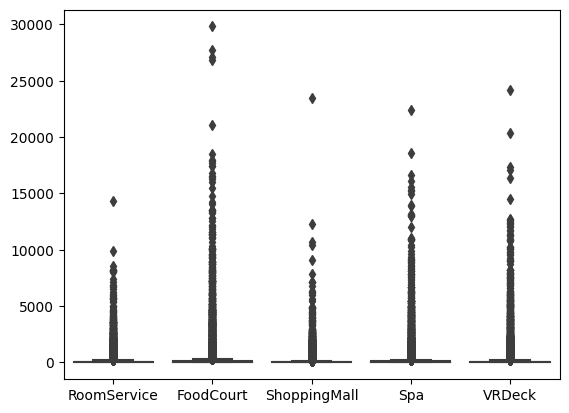

In [1768]:
sns.boxplot(train1[['RoomService','FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']])

In [1769]:
def age_category(number):
    if number<=12:
        return "child"
    elif number>12 and number <20:
        return "teen"
    elif number>=20 and number <40:
        return "young"
    elif number>=40 and number <50:
        return "middle aged"
    else:
        return "old"

In [1770]:
train1['age_category']=train1['Age'].apply(age_category)
test1['age_category']=test1['Age'].apply(age_category)

train1.drop(columns=['Age'],axis=1,inplace=True)
test1.drop(columns=['Age'],axis=1,inplace=True)

In [1771]:
train1 = pd.get_dummies(train1,columns=['HomePlanet','CryoSleep','Destination','VIP','age_category'],dtype='int')
#train1.head()

In [1772]:
encoder = LabelEncoder()
train1['Transported'] = encoder.fit_transform(train1['Transported'])
train1.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,age_category_child,age_category_middle aged,age_category_old,age_category_teen,age_category_young
0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
1,109.0,9.0,25.0,549.0,44.0,1,1,0,0,1,...,0,0,1,1,0,0,0,0,0,1
2,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
3,0.0,1283.0,371.0,3329.0,193.0,0,0,1,0,1,...,0,0,1,1,0,0,0,0,0,1
4,303.0,70.0,151.0,565.0,2.0,1,1,0,0,1,...,0,0,1,1,0,0,0,0,1,0


In [1773]:
test1 = pd.get_dummies(test1,columns=['HomePlanet','CryoSleep','Destination','VIP','age_category'],dtype='int')
test1.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,age_category_child,age_category_middle aged,age_category_old,age_category_teen,age_category_young
0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1
1,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
3,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1
4,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1


In [1774]:
test1_cols=test1.columns

In [1775]:
test1_cols.shape

(20,)

# Data visualisation and Cleaning

In [1776]:
train1.corr().transpose()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,...,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,age_category_child,age_category_middle aged,age_category_old,age_category_teen,age_category_young
RoomService,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048,-0.139941,-0.067476,0.245451,0.243986,...,-0.024288,-0.062828,0.061098,-0.056595,0.056595,-0.106177,0.024856,0.001638,-0.006976,0.049650
FoodCourt,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074,-0.215384,0.365500,-0.124781,0.205682,...,0.134994,-0.065542,-0.078216,-0.126006,0.126006,-0.090480,0.053365,0.034002,-0.075073,0.052519
ShoppingMall,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019,-0.071708,-0.021019,0.111257,0.206366,...,-0.013346,-0.031397,0.031603,-0.018483,0.018483,-0.090661,0.023720,-0.013573,0.021430,0.029590
Spa,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791,-0.159188,0.266323,-0.088140,0.198392,...,0.075242,-0.053428,-0.032948,-0.060573,0.060573,-0.086907,0.040284,0.048837,-0.039969,0.024812
VRDeck,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825,-0.153676,0.282118,-0.111875,0.193107,...,0.089818,-0.045454,-0.050878,-0.123092,0.123092,-0.083440,0.017903,0.030735,-0.057463,0.060689
Transported,-0.242048,0.046074,0.010019,-0.218791,-0.204825,1.000000,-0.168845,0.176916,0.019544,-0.460132,...,0.108722,0.000092,-0.096319,0.037261,-0.037261,0.125399,0.002263,-0.011422,0.016570,-0.079810
HomePlanet_Earth,-0.139941,-0.215384,-0.071708,-0.159188,-0.153676,-0.168845,1.000000,-0.633221,-0.559658,0.107231,...,-0.156169,0.231177,-0.007418,0.162345,-0.162345,0.113805,-0.085285,-0.071660,0.118738,-0.055013
HomePlanet_Europa,-0.067476,0.365500,-0.021019,0.266323,0.282118,0.176916,-0.633221,1.000000,-0.287022,-0.093395,...,0.293517,-0.163308,-0.156958,-0.147008,0.147008,-0.141605,0.084668,0.084766,-0.104360,0.053491
HomePlanet_Mars,0.245451,-0.124781,0.111257,-0.088140,-0.111875,0.019544,-0.559658,-0.287022,1.000000,-0.032715,...,-0.120996,-0.111260,0.177243,-0.043523,0.043523,0.010769,0.014897,-0.002071,-0.035217,0.010813
CryoSleep_False,0.243986,0.205682,0.206366,0.198392,0.193107,-0.460132,0.107231,-0.093395,-0.032715,1.000000,...,-0.065589,-0.087764,0.113380,-0.078281,0.078281,-0.079375,0.018622,0.014379,-0.055035,0.065631


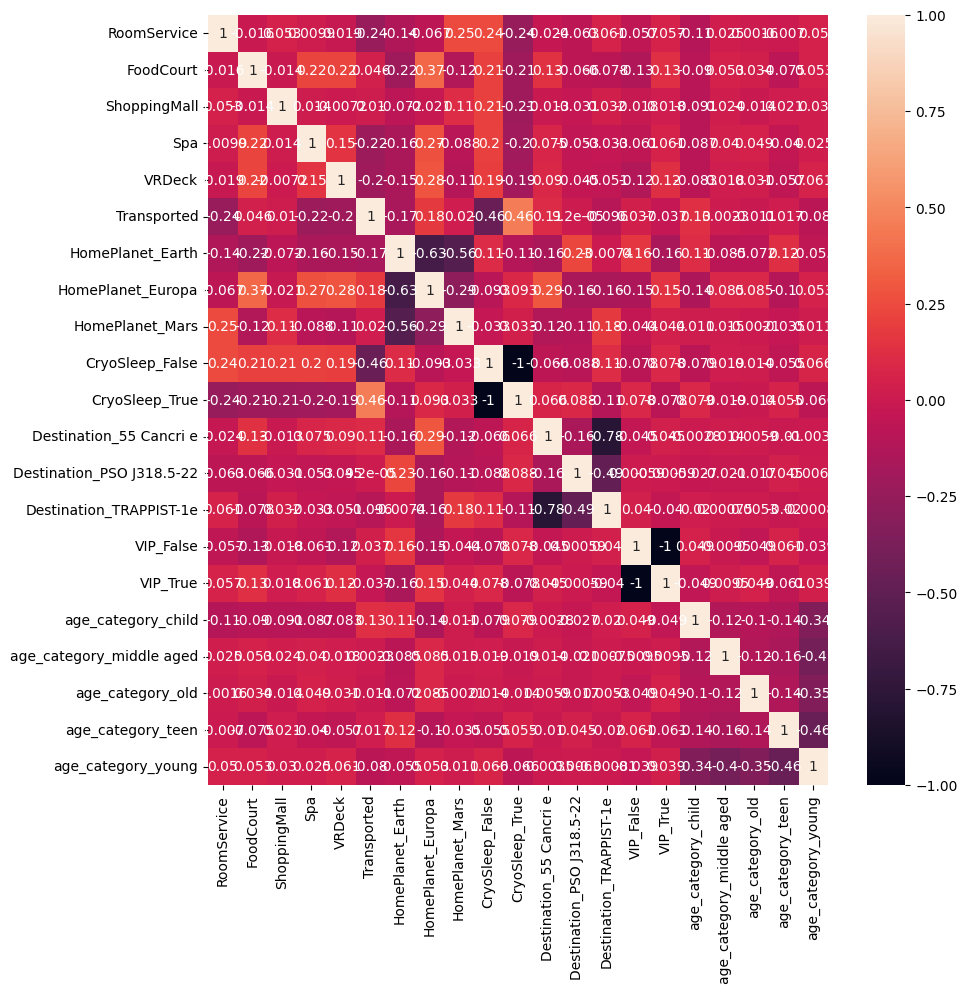

In [1777]:
plt.figure(figsize=(10,10))
sns.heatmap(train1.corr().transpose(),annot=True)
plt.show()


In [1778]:
'''
plt.figure(figsize=(10,10))

sns.boxplot(train1[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])
plt.show()
''' 

"\nplt.figure(figsize=(10,10))\n\nsns.boxplot(train1[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])\nplt.show()\n"

In [1779]:
#train1[train1['Spa']>15000]

In [1780]:
'''
vif = pd.DataFrame()
vif["feature"] = train1.columns
vif["VIF"] = [variance_inflation_factor(train1.values, i) for i in range(len(train1.columns))]
print(vif.sort_values(by = 'VIF',ascending=False,ignore_index=True))
'''

'\nvif = pd.DataFrame()\nvif["feature"] = train1.columns\nvif["VIF"] = [variance_inflation_factor(train1.values, i) for i in range(len(train1.columns))]\nprint(vif.sort_values(by = \'VIF\',ascending=False,ignore_index=True))\n'

In [1781]:
#train1.corr()[['Transported']].sort_values(by = 'Transported',ascending=False)
#train1.drop(columns = 'ShoppingMall',inplace = True)
#train1.shape
 

In [1782]:
#train1.describe().transpose()

In [1783]:
#sns.boxplot(train1['VRDeck'])

# Feature Engineering

In [1784]:
#train1.columns

In [1785]:
'''
train1['extra_services'] = train1['RoomService']+train1['FoodCourt']+train1['ShoppingMall']+train1['Spa']+train1['VRDeck']
train1.drop(columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis =1,inplace =True)


test1['extra_services'] = test1['RoomService']+test1['FoodCourt']+test1['ShoppingMall']+test1['Spa']+test1['VRDeck']
test1.drop(columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis =1,inplace =True)
'''

"\ntrain1['extra_services'] = train1['RoomService']+train1['FoodCourt']+train1['ShoppingMall']+train1['Spa']+train1['VRDeck']\ntrain1.drop(columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis =1,inplace =True)\n\n\ntest1['extra_services'] = test1['RoomService']+test1['FoodCourt']+test1['ShoppingMall']+test1['Spa']+test1['VRDeck']\ntest1.drop(columns = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], axis =1,inplace =True)\n"

# Treat Data skew

In [1786]:
train1.skew().sort_values(ascending=False)

ShoppingMall                 12.781346
VRDeck                        7.905655
Spa                           7.717657
FoodCourt                     7.178159
RoomService                   6.399969
VIP_True                      6.381293
Destination_PSO J318.5-22     2.832741
age_category_child            2.808964
age_category_old              2.797223
age_category_middle aged      2.331052
age_category_teen             1.901355
HomePlanet_Mars               1.482042
Destination_55 Cancri e       1.446133
HomePlanet_Europa             1.185132
CryoSleep_True                0.632024
Transported                  -0.014497
age_category_young           -0.152080
HomePlanet_Earth             -0.211259
CryoSleep_False              -0.632024
Destination_TRAPPIST-1e      -0.880150
VIP_False                    -6.381293
dtype: float64

In [1787]:
'''
train1['ShoppingMall'] = np.log1p(train1['ShoppingMall'])
train1['VRDeck'] = np.log1p(train1['VRDeck'])
train1['Spa'] = np.log1p(train1['Spa'])
train1['FoodCourt'] = np.log1p(train1['FoodCourt'])
train1['RoomService'] = np.log1p(train1['RoomService'])


train1.skew()
'''


"\ntrain1['ShoppingMall'] = np.log1p(train1['ShoppingMall'])\ntrain1['VRDeck'] = np.log1p(train1['VRDeck'])\ntrain1['Spa'] = np.log1p(train1['Spa'])\ntrain1['FoodCourt'] = np.log1p(train1['FoodCourt'])\ntrain1['RoomService'] = np.log1p(train1['RoomService'])\n\n\ntrain1.skew()\n"

# Splitting the dataset

In [1788]:
y =train1['Transported']
X = train1.drop(columns='Transported')

print(y.shape,X.shape)

(8693,) (8693, 20)


In [1789]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=27)
#y_train =pd.DataFrame(y_train)
#y_test =pd.DataFrame(y_test)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6954, 20) (1739, 20) (6954,) (1739,)


# Scaling

In [1790]:
'''
#scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

X_train = scaler2.fit_transform(X_train)
X_test = scaler2.fit_transform(X_test)
test1 = scaler2.fit_transform(test1)
test1  =pd.DataFrame(test1 ,columns = test1_cols)
'''


'\n#scaler1 = MinMaxScaler()\nscaler2 = StandardScaler()\n\nX_train = scaler2.fit_transform(X_train)\nX_test = scaler2.fit_transform(X_test)\ntest1 = scaler2.fit_transform(test1)\ntest1  =pd.DataFrame(test1 ,columns = test1_cols)\n'

In [1791]:
'''
X_train_sc =pd.DataFrame(X_train_sc,columns = X_train.columns)
X_test_sc =pd.DataFrame(X_test_sc,columns = X_test.columns)
'''

'\nX_train_sc =pd.DataFrame(X_train_sc,columns = X_train.columns)\nX_test_sc =pd.DataFrame(X_test_sc,columns = X_test.columns)\n'

# Modelling

In [1792]:
def evaluate_classifiers(X_train,X_test,y_train,y_test):
    
    models = {
      "Support Vector Classifier": SVC(),
      "K-Nearest Neighbors": KNeighborsClassifier(),
      "Decision Tree": DecisionTreeClassifier(),
      "Random Forest": RandomForestClassifier(), 
      "MLPClassifier": MLPClassifier(),
      "RandomForestClassifier": RandomForestClassifier(), 
      "GradientBoostingClassifier": GradientBoostingClassifier(),
      "AdaBoostClassifier": AdaBoostClassifier(),
      "XGBClassifier": XGBClassifier()
      }
  
    results = []
    for name,model in models.items():
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test,y_pred)   
        results.append({'name':name,'model':model,'accuracy':accuracy})
    
    
    df_results = pd.DataFrame(results).sort_values(by=['accuracy'],ascending=False, ignore_index= True)
    return df_results
  
df_scores = evaluate_classifiers(X_train, X_test, y_train, y_test)
print(df_scores)



                         name  \
0  GradientBoostingClassifier   
1               XGBClassifier   
2          AdaBoostClassifier   
3   Support Vector Classifier   
4               Random Forest   
5      RandomForestClassifier   
6         K-Nearest Neighbors   
7               MLPClassifier   
8               Decision Tree   

                                               model  accuracy  
0  ([DecisionTreeRegressor(criterion='friedman_ms...  0.794135  
1  XGBClassifier(base_score=None, booster=None, c...  0.790109  
2  (DecisionTreeClassifier(max_depth=1, random_st...  0.783784  
3                                              SVC()  0.783209  
4  (DecisionTreeClassifier(max_features='sqrt', r...  0.776308  
5  (DecisionTreeClassifier(max_features='sqrt', r...  0.774008  
6                             KNeighborsClassifier()  0.759632  
7                                    MLPClassifier()  0.746406  
8                           DecisionTreeClassifier()  0.727430  


In [1793]:
print("The best model is "+str(df_scores.iloc[0,0])+ " with the Accuracy score of "+str(round(df_scores.iloc[0,2]*100,4))+" %.")

The best model is GradientBoostingClassifier with the Accuracy score of 79.4135 %.


In [1794]:
selected_model = df_scores.iloc[0,1]
selected_model

GradientBoostingClassifier()

In [1795]:
test1.head()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_False,CryoSleep_True,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True,age_category_child,age_category_middle aged,age_category_old,age_category_teen,age_category_young
0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1
1,0.0,9.0,0.0,2823.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0
2,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1
3,0.0,6652.0,0.0,181.0,585.0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1
4,10.0,0.0,635.0,0.0,0.0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1


In [1796]:
selected_model.fit(X_train,y_train)
y_pred1 = selected_model.predict(test1)

In [1797]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'],
                          'Transported' : y_pred1})
submission['Transported'] = submission['Transported'].map({1: True, 0: False})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [1798]:
current_time = datetime.now()
print(current_time)

2024-05-23 21:52:35.618450


In [1799]:
submission.to_csv(f'submission_{current_time}.csv',index =False)